<a href="https://colab.research.google.com/github/DHub6/UAS_DATAMINING/blob/main/201220092_DickyPriamBudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library penting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [4]:
#load dataset
data = pd.read_csv('Bank Customer Churn Dataset.csv')
data['gender'].replace({'Male':1, 'Female':0}, inplace = True)
data['country'].replace({'France':1, 'Spain':2, 'Germany':3}, inplace = True)
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [6]:
#cek jumlah data dan kolomnya
data.shape

(10000, 12)

In [7]:
#cek data kosong
data.isnull().values.any()

False

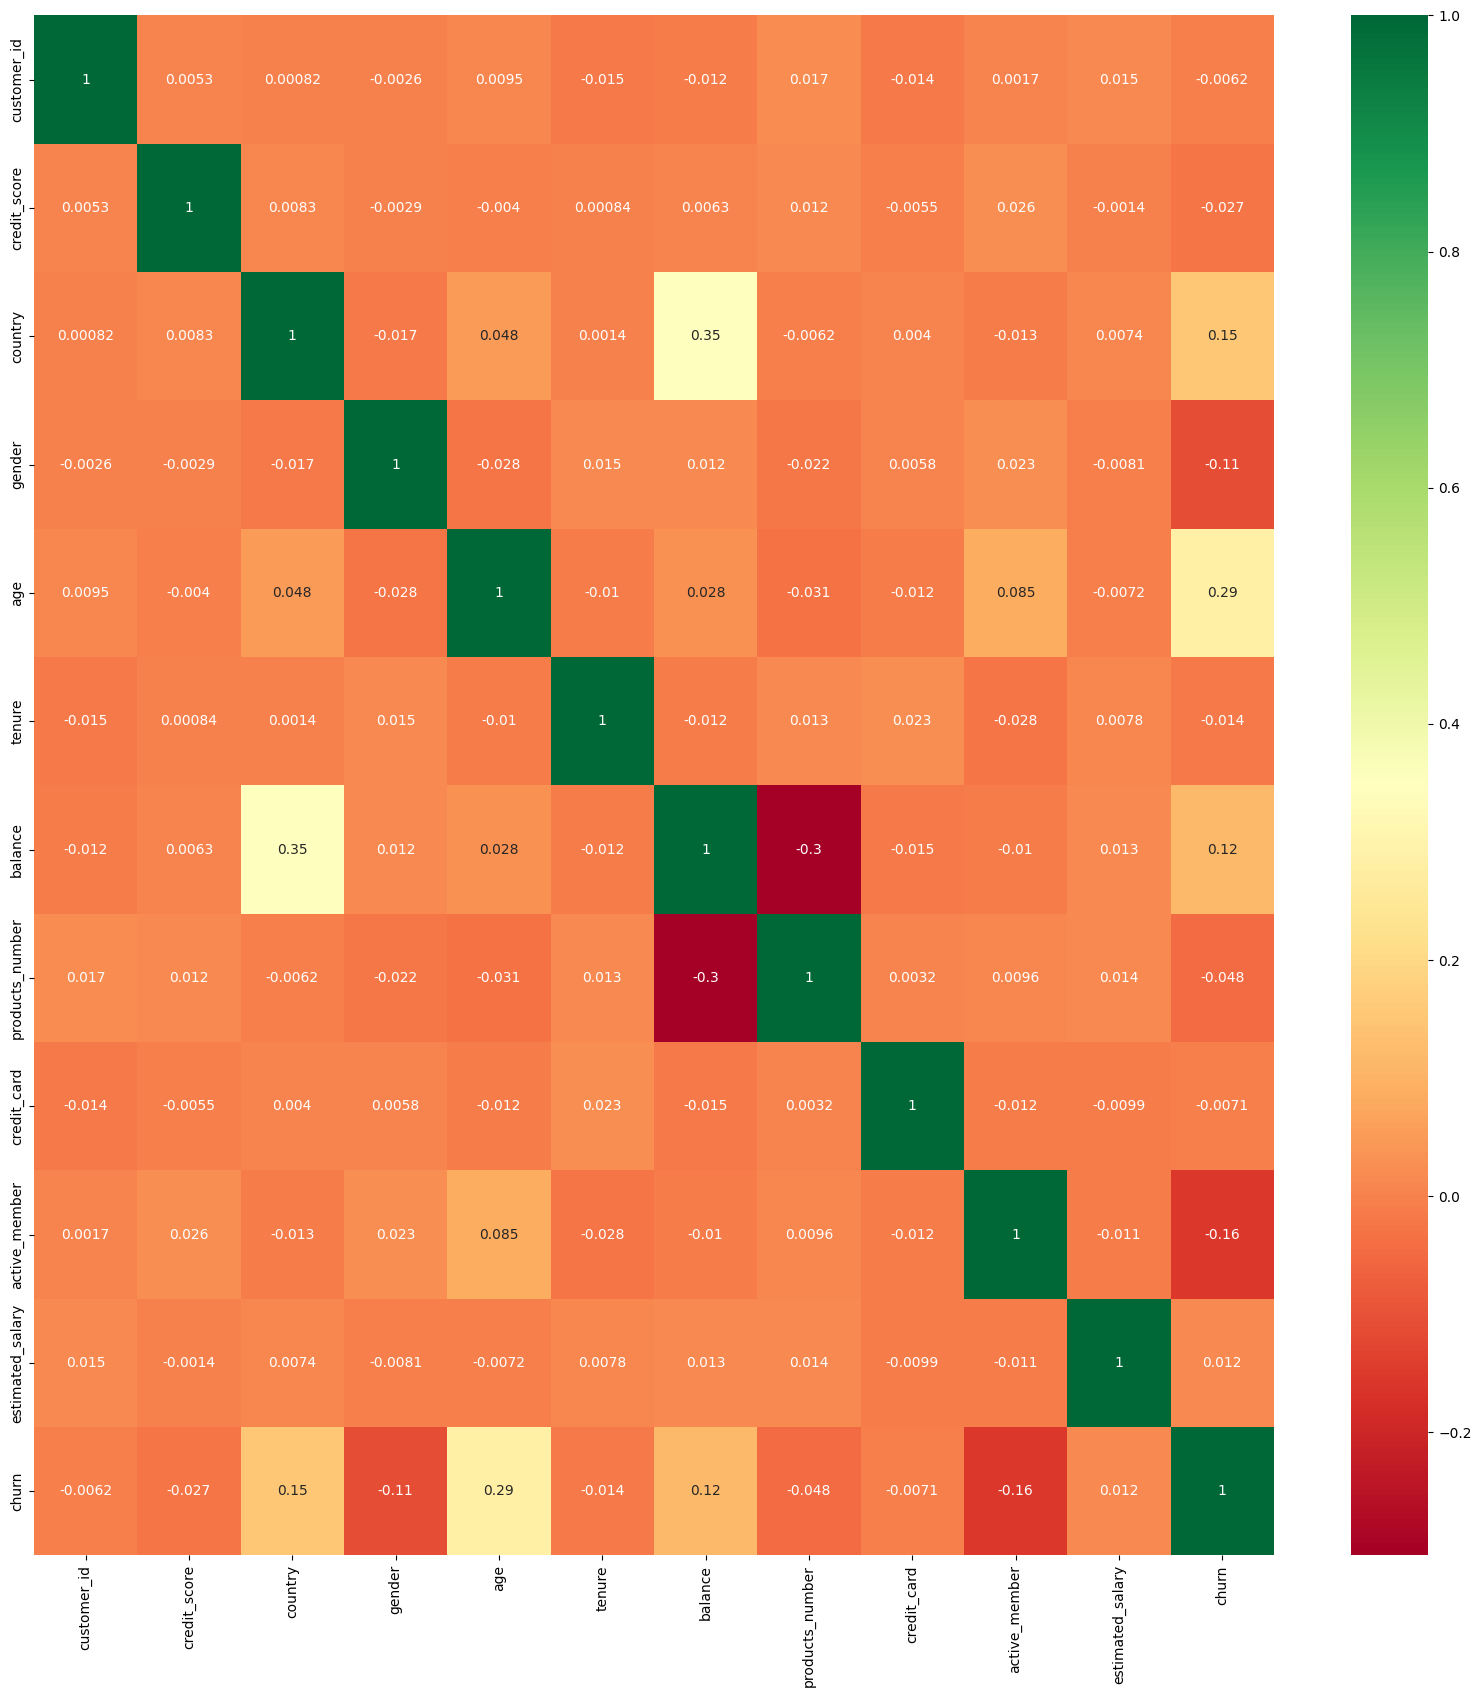

In [8]:
#Korelasi menggunakan heatmap

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [9]:
#Show corellation in tables
data.corr()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.000821,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.000821,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
gender,-0.002641,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009497,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


In [10]:
#statistika dasar
data.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#checking skewness dari data
customer_true_count =len(data.loc[data['churn']== 1])
customer_false_count = len(data.loc[data['churn']== 0])

In [12]:
#view
(customer_true_count,customer_false_count)

(2037, 7963)

In [13]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 12


In [14]:
#searching missing value 0
for missing in data.columns:
  print('Banyak baris nilai nol untuk {0} : {1}'.format(missing, len(data.loc[data[missing]==0])))

Banyak baris nilai nol untuk customer_id : 0
Banyak baris nilai nol untuk credit_score : 0
Banyak baris nilai nol untuk country : 0
Banyak baris nilai nol untuk gender : 4543
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk tenure : 413
Banyak baris nilai nol untuk balance : 3617
Banyak baris nilai nol untuk products_number : 0
Banyak baris nilai nol untuk credit_card : 2945
Banyak baris nilai nol untuk active_member : 4849
Banyak baris nilai nol untuk estimated_salary : 0
Banyak baris nilai nol untuk churn : 7963


In [15]:
data2 = data.copy()

In [16]:
#rata-rata
avg_gender = data2['gender'].mean()
avg_tenure= data2['tenure'].mean()
avg_balance = data2['balance'].mean()
avg_credit_card = data2['credit_card'].mean()
avg_active_member = data2['active_member'].mean()

In [17]:
#now replace avg to columns
data2['gender'].replace({0:avg_gender},inplace=True)
data2['tenure'].replace({0:avg_tenure},inplace=True)
data2['balance'].replace({0:avg_balance},inplace=True)
data2['credit_card'].replace({0:avg_credit_card},inplace=True)
data2['active_member'].replace({0:avg_active_member},inplace=True)

In [18]:
#double check
for missing in data.columns:
  print('Banyak baris nilai nol untuk {0} : {1}'.format(missing, len(data2.loc[data2[missing]==0])))

Banyak baris nilai nol untuk customer_id : 0
Banyak baris nilai nol untuk credit_score : 0
Banyak baris nilai nol untuk country : 0
Banyak baris nilai nol untuk gender : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk tenure : 0
Banyak baris nilai nol untuk balance : 0
Banyak baris nilai nol untuk products_number : 0
Banyak baris nilai nol untuk credit_card : 0
Banyak baris nilai nol untuk active_member : 0
Banyak baris nilai nol untuk estimated_salary : 0
Banyak baris nilai nol untuk churn : 7963


In [44]:
data2 = data2[['gender', 'tenure', 'balance', 'credit_card', 'active_member', 'churn']]
data2

,gender,tenure,balance,credit_card,active_member,churn
0,0.5457,2.0,76485.889288,1.0000,1.0000,1
1,0.5457,1.0,83807.860000,0.7055,1.0000,0
2,0.5457,8.0,159660.800000,1.0000,0.5151,1
3,0.5457,1.0,76485.889288,0.7055,0.5151,0
4,0.5457,2.0,125510.820000,1.0000,1.0000,0
...,...,...,...,...,...,...
9995,1.0000,5.0,76485.889288,1.0000,0.5151,0
9996,1.0000,10.0,57369.610000,1.0000,1.0000,0
9997,0.5457,7.0,76485.889288,0.7055,1.0000,1
9998,1.0000,3.0,75075.310000,1.0000,0.5151,1


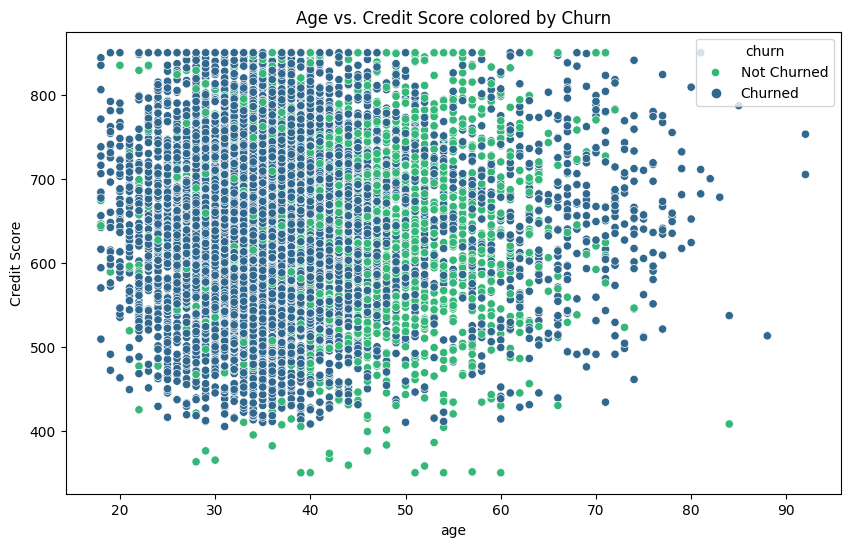

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='credit_score', hue='churn', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('age')
plt.ylabel('Credit Score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

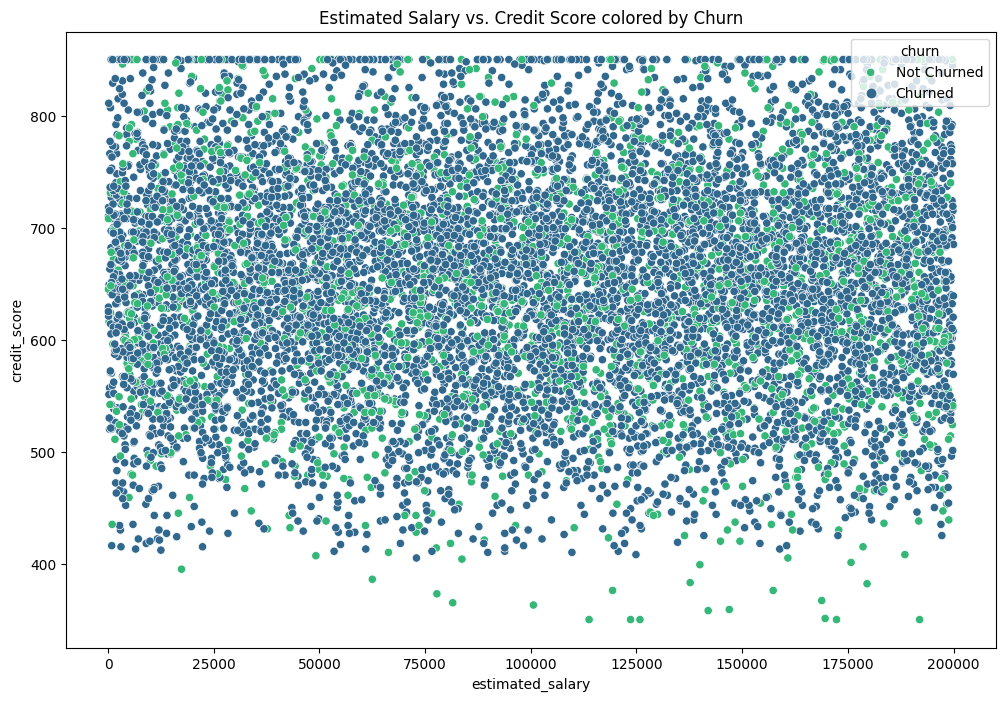

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='estimated_salary', y='credit_score', hue='churn', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('estimated_salary')
plt.ylabel('credit_score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

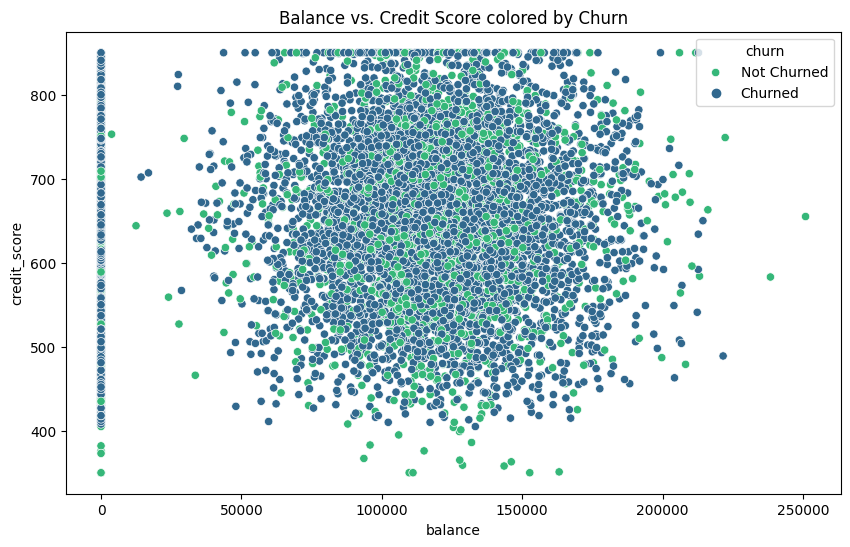

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='balance', y='credit_score', hue='churn', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('balance')
plt.ylabel('credit_score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [25]:
X = data2.drop('churn', axis=1)
y = data2['churn']

In [26]:
#cek data X
X

,gender,tenure,balance,credit_card,active_member
0,0.5457,2.0,76485.889288,1.0000,1.0000
1,0.5457,1.0,83807.860000,0.7055,1.0000
2,0.5457,8.0,159660.800000,1.0000,0.5151
3,0.5457,1.0,76485.889288,0.7055,0.5151
4,0.5457,2.0,125510.820000,1.0000,1.0000
...,...,...,...,...,...
9995,1.0000,5.0,76485.889288,1.0000,0.5151
9996,1.0000,10.0,57369.610000,1.0000,1.0000
9997,0.5457,7.0,76485.889288,0.7055,1.0000
9998,1.0000,3.0,75075.310000,1.0000,0.5151


In [27]:
#cek data y
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [28]:
#Bagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,gender,tenure,balance,credit_card,active_member
9254,1.0000,6.0,76485.889288,1.0000,1.0000
1561,1.0000,4.0,119624.600000,1.0000,1.0000
1670,1.0000,3.0,114739.920000,1.0000,0.5151
6087,0.5457,9.0,135637.000000,1.0000,0.5151
6669,1.0000,9.0,142147.320000,0.7055,0.5151
...,...,...,...,...,...
5734,1.0000,8.0,69712.740000,1.0000,1.0000
5191,0.5457,1.0,76485.889288,1.0000,1.0000
5390,0.5457,1.0,76485.889288,0.7055,0.5151
860,1.0000,8.0,190227.460000,1.0000,0.5151


In [30]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 8000, dtype: int64

In [31]:
X_train.shape

(8000, 5)

In [32]:
y_train.shape

(8000,)

In [33]:
X_test

,gender,tenure,balance,credit_card,active_member
6252,1.0000,3.0,96709.070000,0.7055,0.5151
4684,1.0000,1.0,76485.889288,1.0000,1.0000
1731,0.5457,4.0,76485.889288,1.0000,0.5151
4742,1.0000,8.0,119152.100000,1.0000,1.0000
4521,0.5457,7.0,124995.980000,1.0000,1.0000
...,...,...,...,...,...
6412,0.5457,5.0,98268.840000,0.7055,1.0000
8285,1.0000,10.0,76485.889288,0.7055,1.0000
7853,0.5457,7.0,76485.889288,1.0000,0.5151
1095,1.0000,4.0,76485.889288,1.0000,0.5151


In [34]:
#Inisialisasi dan Training Model Logistic Regression
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [35]:
#Prediksi model yang telah di training
nb_pred = nb.predict(X_test)

In [36]:
#Evaluasi Model
print(accuracy_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

0.8035
[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import pickle

pickle.dump(nb,open('GaussianNB.pkl','wb'))

In [38]:
!pip install -q streamlit
!pip install ydata-Profiling
!pip install streamlit_pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.3 MB/s

In [39]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.125.88.116


In [45]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.88.116:8501

npx: installed 22 in 2.745s
your url is: https://smooth-sites-flash.loca.lt
2024-01-11 16:26:55.106 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 99, in <module>
    user_data = user_report()
  File "/content/app.py", line 84, in user_report
    balance = st.sidebar.slider('balance',3768.6900,250898.09, 200000)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/metrics_util.py", line 396, in wrapped_func
    result = non_optional_func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/elements/widgets/slider.py", line 339, in slider
    